In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.decomposition import PCA


from sklearn import ensemble

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px


In [2]:
data = pd.read_csv("final_proj_data/contraceptive/contraceptive_for_students.csv")

# Question:
### Stage 1:
Predict whether the woman uses contraceptive methods 

### Stage 2:
For all the women who use the contraceptive methods,
predict the extent the women use the methods


# Help Function:

In [3]:
def normalize_and_scale(data):
    response = data['contraceptive']
    x = data.drop("contraceptive", axis=1)
    data_centered_scaled = x - np.mean(x,axis=0)
    data_centered_scaled = data_centered_scaled.div(np.std(data_centered_scaled), axis=1)
    return response, data_centered_scaled, x

In [4]:
def plot_first_2_pcas(dat_1st_2_pcs, hue_col):
    sns.scatterplot(data = dat_1st_2_pcs, 
                x = 'pc1', 
                y = 'pc2', 
                hue = hue_col, 
                    palette = "RdBu")
    plt.gca().set_xlim(-10, 10);
    plt.gca().set_ylim(-10, 10);

In [5]:
def plot_first_3_pcas(pcas, hue_col):
    fig = px.scatter_3d(pcas, 
                    x='pc1', y='pc2', z='pc3', 
                    range_x = [-10, 10], 
                    range_y = [-10, 10], 
                    range_z = [-10, 10], 
                    color = hue_col, 
                    color_continuous_scale = 'RdBu');
    fig.show();

In [26]:
def create_jittered_pair_plot(data, selected_cols):
    data_pairplot_jittered = data[selected_cols]
    data_pairplot_jittered = data_pairplot_jittered + np.random.normal(0, 0.15, size = data_pairplot_jittered.shape)
    data_pairplot_jittered["contraceptive"] = data_2["contraceptive"]
    sns.pairplot(data_pairplot_jittered, hue="contraceptive", 
                 vars=selected_cols, 
                 palette="husl", plot_kws={'alpha': 0.5})

# EDA:

In [6]:
# check missing values 
data.isna().sum()

wife_age              0
wife_education        0
husband_education     0
num_child             0
wife_religion         0
wife_work             0
husband_occupation    0
standard_living       0
media_exposure        0
contraceptive         0
dtype: int64

In [7]:
data['contraceptive'].replace({1: 0, 2: 1, 3: 2}, inplace=True)

In [8]:
temp = pd.DataFrame(data=np.random.normal(0, 1, (20, 10)))

pca = PCA(n_components=5)
pca.fit(temp)
pca_compo = pd.DataFrame(pca.components_)
# pca_compo.head()

In [9]:
response, data_centered_scaled, X = normalize_and_scale(data)

In [10]:
u, s, vt = np.linalg.svd(data_centered_scaled, full_matrices = False)

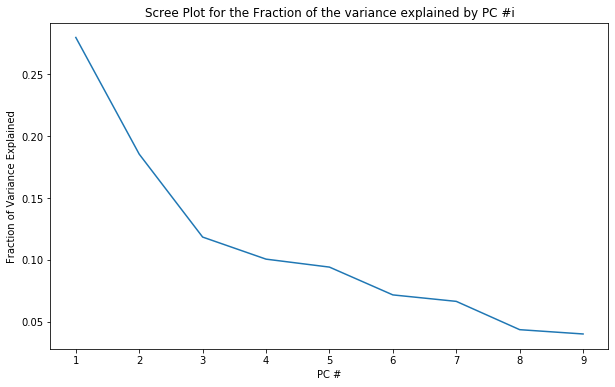

In [11]:
figure(figsize=(10,6))
xx = list(range(1, s.shape[0]+1))
plt.plot(xx, s**2 / sum(s**2));
plt.xticks(xx, xx);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained')
plt.title("Scree Plot for the Fraction of the variance explained by PC #i");

In [12]:
pcs = data_centered_scaled@vt.T
dat_3_pcs_scaled = pd.DataFrame({'pc1': pcs.iloc[:,0], 'pc2':  pcs.iloc[:,1],
                                     'pc3': pcs.iloc[:,2],
                                    'contraceptive':response})

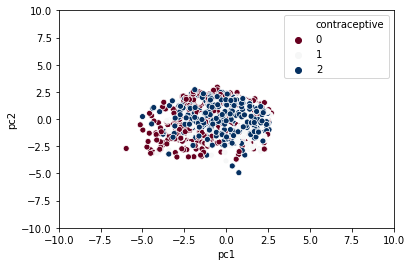

In [13]:
plot_first_2_pcas(dat_3_pcs_scaled, "contraceptive")

In [14]:
plot_first_3_pcas(dat_3_pcs_scaled, "contraceptive")

### redefine the categories of y

In [15]:
data_2 = data.replace({2: 1})
response_2, data_centered_scaled_2, X_2 = normalize_and_scale(data_2)

In [16]:
u_2, s_2, vt_2 = np.linalg.svd(data_centered_scaled_2, full_matrices = False)
pcs_2 = data_centered_scaled_2@vt_2.T
dat_3_pcs_scaled_2 = pd.DataFrame({'pc1': pcs_2.iloc[:,0], 'pc2':  pcs_2.iloc[:,1],
                                     'pc3': pcs_2.iloc[:,2],
                                    'contraceptive':response_2})

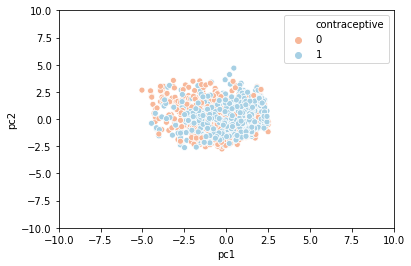

In [17]:
plot_first_2_pcas(dat_3_pcs_scaled_2, "contraceptive")

In [18]:
plot_first_3_pcas(dat_3_pcs_scaled_2, "contraceptive")

### Contraceptive Extend PCA

In [22]:
contra_extend = data.loc[data["contraceptive"] > 0, :]
contra_extend['contraceptive'].replace({1: 0, 2: 1}, inplace=True)

response_extend, extend_centered_scaled, x_extend = normalize_and_scale(data_2)

In [23]:
u_extend, s_extend, vt_extend = np.linalg.svd(extend_centered_scaled, full_matrices = False)
pcs_extend = extend_centered_scaled@vt_extend.T
extend_3_pcs_scaled = pd.DataFrame({'pc1': pcs_extend.iloc[:,0], 'pc2':  pcs_extend.iloc[:,1],
                                     'pc3': pcs_extend.iloc[:,2],
                                    'contraceptive':response_extend})

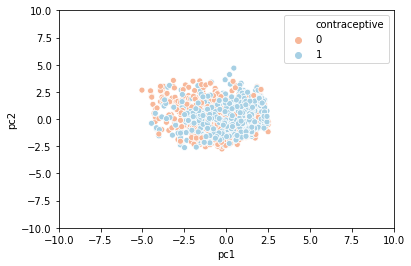

In [24]:
plot_first_2_pcas(extend_3_pcs_scaled, "contraceptive")

In [25]:
plot_first_3_pcas(extend_3_pcs_scaled, "contraceptive")

1. Boxplot 
2. Heatmap
3. Pairplot? 

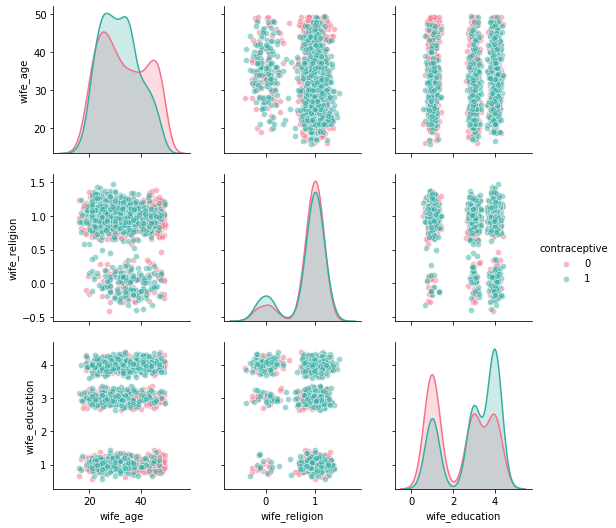

In [27]:
selected_cols_1 = ["wife_age", "wife_religion", "wife_education"]
create_jittered_pair_plot(data_2, selected_cols_1)
plt.show();

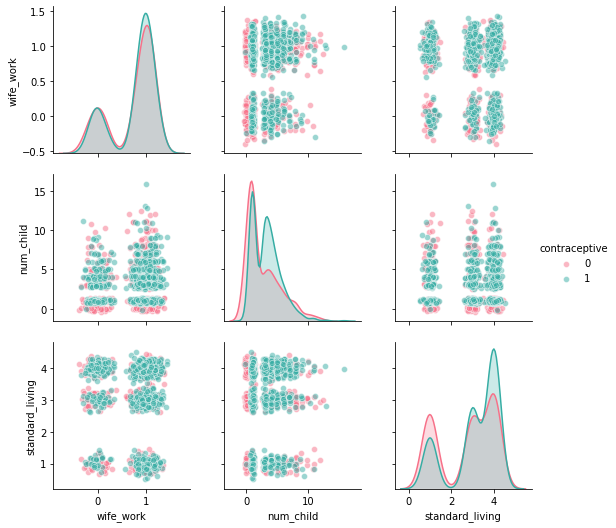

In [28]:
selected_cols_2 = ["wife_work","num_child","standard_living"]
create_jittered_pair_plot(data_2, selected_cols_2)
plt.show();

## Heatmap

In [ ]:
corr = image1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatco = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Boxplots for Quantitative Discrete Values

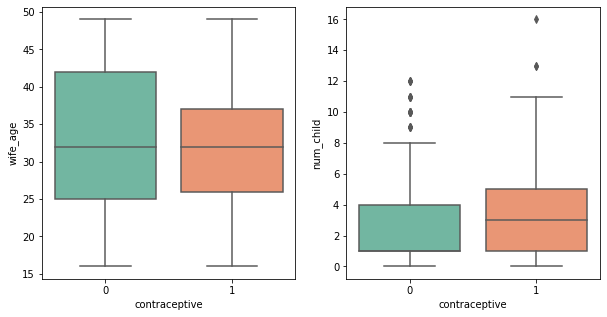

In [29]:
fig1, axes = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(x="contraceptive", y="wife_age", data=data_2,
    palette="Set2",ax=axes[0])
sns.boxplot(x="contraceptive", y='num_child', data=data_2,
    palette="Set2",ax=axes[1])

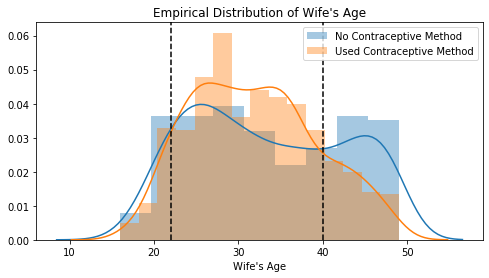

In [30]:
# wife_age distribution plot
plt.figure(figsize=(8, 4))
sns.distplot(data_2.loc[(data_2["contraceptive"]==0) , "wife_age"])
sns.distplot(data_2.loc[(data_2["contraceptive"]==1) , "wife_age"])
plt.xlabel("Wife's Age")
plt.title("Empirical Distribution of Wife's Age")
plt.legend(labels=["No Contraceptive Method", "Used Contraceptive Method"]) 
plt.axvline(22, color='k', linestyle='dashed')
plt.axvline(40, color='k', linestyle='dashed')
plt.show();

### Result
Based on the distribution of the data, we decide to split the feature `wife_age` into 3 bins, namely, 
1. age <= 22; 
2. 22 < age < 40; 
3. age >= 40

In [ ]:
temp = data_2.copy()
temp[temp["wife_age"] <= 22] = 0
temp[temp["wife_age"] in range(23, 40)] = 1
temp[temp["wife_age"] >= 40] = 2

### Barplot for Qualitative Data

<Figure size 1080x720 with 0 Axes>

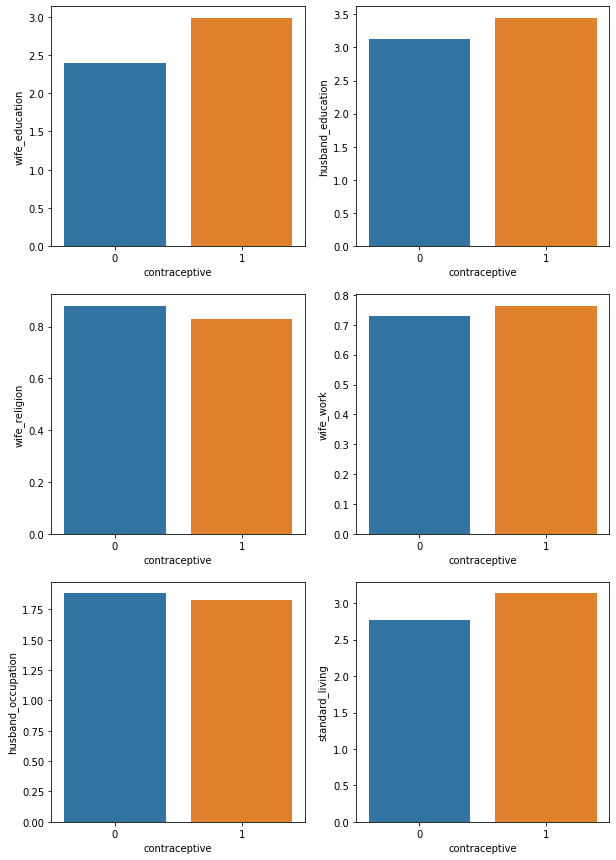

In [31]:
plt.figure(figsize=(15, 10))
col_names = list(data_2.columns.values)[1:]
col_names.pop(2)
col_names.pop(-1)
k = 2
fig1, axes = plt.subplots(int(np.ceil((len(col_names) - 1)/k)), k, figsize=(10,15))
for i in range(0, len(col_names) - 1):
    sns.barplot(x="contraceptive", y=col_names[i], data=data_2, 
                ax=axes[i//k][i%k], ci=None)

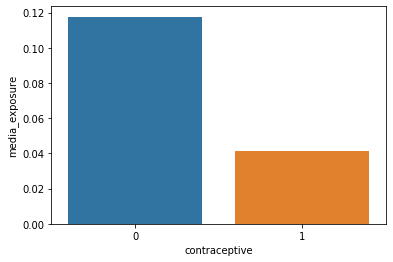

In [32]:
sns.barplot(x="contraceptive", y=col_names[-1], data=data_2, ci=None)

# Feature Engineering
1. Normalization 
2. Log transformed some features
3. Age seperate into bins
4. Drop Useless Features
5. Simplify Features Categories

# Model Building

## 1. Logistic Regression 

## 2. K-NN 

## 3. Random Forest

In [34]:
x_train, x_test,y_train,y_test = train_test_split(X_2,response_2, test_size=0.25, 
                                                  random_state=2938)

print("Training Data Size:", {len(x_train)})
print("Test Data Size:", {len(x_test)})

Training Data Size: {1104}
Test Data Size: {369}


In [37]:
# logistic regression based on raw features
lr = LogisticRegression(fit_intercept=True)

lr.fit(x_train,y_train)
model_predicted_train = lr.predict(x_train)
model_predicted_test = lr.predict(x_test)
train_accuracy = 1/(x_train.shape[0])*np.sum(y_train==model_predicted_train)
test_accuracy = 1/(x_test.shape[0])*np.sum(y_test==model_predicted_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.6730
Test accuracy: 0.6504


/Users/angelynaye/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [4]:
data = pd.read_csv("final_proj_data/contraceptive/contraceptive_for_students.csv")
data['contraceptive'].replace({1: 0, 2: 1, 3: 1}, inplace=True)
train, test = train_test_split(data, test_size=0.15, random_state=100)
X_train = train.drop("contraceptive", axis = 1)
X_test = test.drop("contraceptive", axis = 1)
y_train = train["contraceptive"]
y_test = test["contraceptive"]

In [5]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_accuracy(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    accuracies = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        accuracies.append(model.score(X.iloc[va_ind,:], y.iloc[va_ind]))
    return np.mean(accuracies)

In [6]:
model = ensemble.RandomForestClassifier(n_estimators= 30)
#model.fit(X_train, y_train)
print ("Cross validation error with all features: " + str(cross_validate_accuracy(model, X_train, y_train)))

Cross validation error with all features: 0.6900908366533866


In [7]:
features = X_train.columns
features

Index(['wife_age', 'wife_education', 'husband_education', 'num_child',
       'wife_religion', 'wife_work', 'husband_occupation', 'standard_living',
       'media_exposure'],
      dtype='object')

In [8]:
for f in features:
    X_train_cur = X_train.copy()
    X_train_cur = X_train_cur.drop(f, axis = 1)
    print("Removing " + f + ": " + str(cross_validate_accuracy(model, X_train_cur, y_train)))

Removing wife_age: 0.6373737051792829
Removing wife_education: 0.6653290836653387
Removing husband_education: 0.6812844621513945
Removing num_child: 0.5910629482071713
Removing wife_religion: 0.6852908366533864
Removing wife_work: 0.6860685258964143
Removing husband_occupation: 0.6836908366533865
Removing standard_living: 0.6892653386454184
Removing media_exposure: 0.6860972111553785


In [9]:
# Removed husband_occupation
features_8 = features.copy()
features_8 = features_8.drop(["husband_occupation", "standard_living", "wife_religion"])
for f in features_8:
    X_train_cur = X_train.copy()
    X_train_cur = X_train_cur.drop(f, axis = 1)
    print("Removing " + f + ": " + str(cross_validate_accuracy(model, X_train_cur, y_train)))

Removing wife_age: 0.649373705179283
Removing wife_education: 0.6708876494023905
Removing husband_education: 0.6740908366533865
Removing num_child: 0.5966820717131475
Removing wife_work: 0.6876876494023905
Removing media_exposure: 0.6940685258964143


In [10]:
X_train_8 = X_train.drop(["husband_occupation", "standard_living", "wife_religion"], axis = 1)
cross_validate_accuracy(model, X_train_8, y_train)

0.6892653386454184